In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.optimize import curve_fit
from state_space_setup import *

In [4]:
def downtime_cost(num_parts, k=604800, lambda_=2, cost_per_week=16800):
    m = np.arange(1, k + 1)
    i = np.arange(num_parts)

    lambda_m = (lambda_ / k) * (k - m[:, None])
    pmf = stats.poisson.pmf(i[None, :], lambda_m)
    sf = stats.poisson.sf(num_parts - i - 1, lambda_ / k)

    prob = np.sum(pmf * sf, axis=1)
    weighted_cost = prob * (m / k) * cost_per_week
    total_cost = np.sum(weighted_cost)
    normalization = stats.poisson.sf(num_parts - 1, lambda_)

    return total_cost / normalization


list_of_nums = np.arange(1, 199, 2)
downtime_costs = []

for num in list_of_nums:
    downtime_costs.append(downtime_cost(num))

downtime_costs = np.array(downtime_costs)



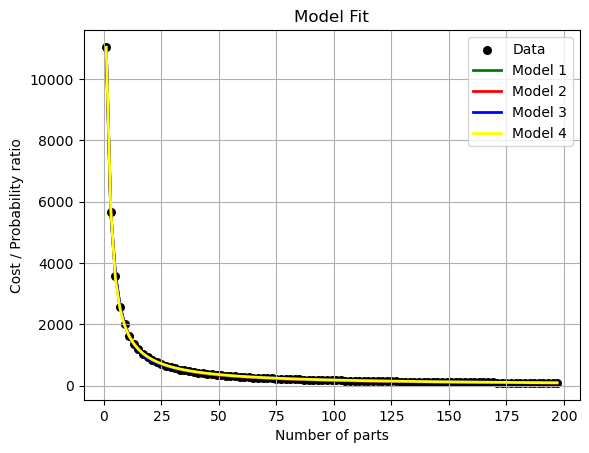

Parameters of model 1 
 [3.05172815e+02 3.41314182e-01 5.45178030e+03 1.40457067e+04
 3.07637369e+00 1.40564016e+00]
Parameters of model 2 
 [ 3.22340437e+04 -2.37728642e+03  7.46292377e+03  6.48606942e+00
  1.95478870e+00]
Parameters of model 3 (a * exp(-b * x) + c + d * x * exp(-e * x))
 [4.07701865e+03 2.68188919e-01 1.85258247e+04 6.40129066e+03]
Parameters of model 4 (degree 4 inverse polynomial with fixed intercept (0,16800))
 [17995.59105254 14445.78131987 -4703.82220106  1184.11931874]


In [5]:
x = list_of_nums
y = downtime_costs

def model1(x, a, b, c, d, e, f):
    return a * np.exp(-b * x) + (c + d / (x + f))  * (np.sin(e / (x + f)))

def model2(x, a, c, d, e, f):
    return a / (x + f) + (c + d / (x + f))  * (np.sin(e / (x + f)))

def model3(x, a, b, c, d):
    return a * np.exp(-b * x) + c / (x + 2 * c/(16800 - a)) + d / ((x ** 2) + 2 * d/(16800 - a))

def model4(x, a, b, c, d):
    return a / (x + a/16800) + b / ((x ** 2) + b/16800) + \
           c / ((x ** 3) + c/16800) + d / ((x ** 4) + d/16800)

popt1, _ = curve_fit(model1, x, y, p0=[300, 0.4, 3000, 9000, 5, 1])
popt2, _ = curve_fit(model2, x, y, p0=[300, 3000, 9000, 5, 1])
popt3, _ = curve_fit(model3, x, y, p0=[10000, 0.2, 1000, 0.2])
popt4, _ = curve_fit(model4, x, y, p0=[20000, 15000, -4000, 1000])


plt.scatter(x, y, label='Data', color='black', s=30)
plt.plot(x, model1(x, *popt1), color='green', linewidth=2, label='Model 1')
plt.plot(x, model2(x, *popt2), color='red', linewidth=2, label='Model 2')
plt.plot(x, model3(x, *popt3), color='blue', linewidth=2, label='Model 3')
plt.plot(x, model4(x, *popt4), color='yellow', linewidth=2, label='Model 4')
plt.legend()
plt.xlabel("Number of parts")
plt.ylabel("Cost / Probability ratio")
plt.title("Model Fit")
plt.grid(True)
plt.show()

print("Parameters of model 1 \n", popt1)
print("Parameters of model 2 \n", popt2)
print("Parameters of model 3 (a * exp(-b * x) + c + d * x * exp(-e * x))\n", popt3)
print("Parameters of model 4 (degree 4 inverse polynomial with fixed intercept (0,16800))\n", popt4)


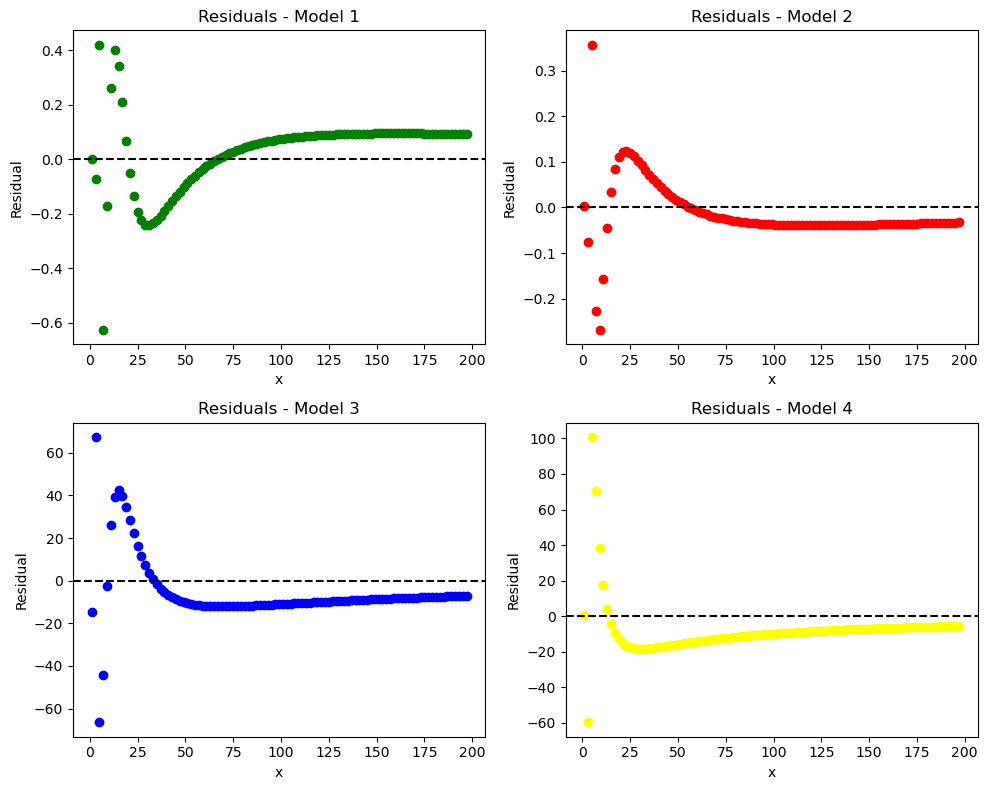

In [6]:
# predicted values
y_pred1 = model1(x, *popt1)
y_pred2 = model2(x, *popt2)
y_pred3 = model3(x, *popt3)
y_pred4 = model4(x, *popt4)

# residuals
residuals1 = y - y_pred1
residuals2 = y - y_pred2
residuals3 = y - y_pred3
residuals4 = y - y_pred4

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(x, residuals1, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals - Model 1")
plt.xlabel("x")
plt.ylabel("Residual")

plt.subplot(2, 2, 2)
plt.scatter(x, residuals2, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals - Model 2")
plt.xlabel("x")
plt.ylabel("Residual")

plt.subplot(2, 2, 3)
plt.scatter(x, residuals3, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals - Model 3")
plt.xlabel("x")
plt.ylabel("Residual")

plt.subplot(2, 2, 4)
plt.scatter(x, residuals4, color='yellow')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals - Model 4")
plt.xlabel("x")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()

In [7]:
print(model2(0, *popt2))
print(residuals2)
print(downtime_costs)
print(-np.diff(downtime_costs, ))

16236.93068656566
[ 0.00254682 -0.07575616  0.35693945 -0.22646451 -0.26847595 -0.15714228
 -0.04538781  0.03425531  0.08334273  0.10994641  0.12147035  0.12337272
  0.11938099  0.11195462  0.10268558  0.09258917  0.08230227  0.072215
  0.06255724  0.05345531  0.04496908  0.03711631  0.02988864  0.02326202
  0.01720356  0.01167598  0.00664046  0.00205844 -0.00210732 -0.00589206
 -0.00932874 -0.01244786 -0.0152775  -0.01784338 -0.02016897 -0.02227565
 -0.02418286 -0.02590826 -0.02746787 -0.02887623 -0.03014655 -0.0312908
 -0.03231986 -0.0332436  -0.03407099 -0.03481021 -0.03546866 -0.03605313
 -0.03656976 -0.03702417 -0.03742149 -0.0377664  -0.03806318 -0.03831574
 -0.03852767 -0.03870224 -0.03884247 -0.03895111 -0.0390307  -0.03908357
 -0.03911184 -0.0391175  -0.03910236 -0.03906808 -0.0390162  -0.03894813
 -0.0388652  -0.0387686  -0.03865946 -0.03853879 -0.03840757 -0.03826666
 -0.03811689 -0.03795901 -0.03779372 -0.03762167 -0.03744346 -0.03725965
 -0.03707075 -0.03687725 -0.03667958

In [10]:
c = downtime_cost(21, k=1000000, lambda_=2, cost_per_week=16800)
print(c)

832.1830016059971
